# Final PJT - EDA & Preprocessing (2)

이해원

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

plt.rcParams['font.family'] ='D2Coding'
pd.set_option('display.max_columns', None)

In [3]:
customer = pd.read_csv('SDB2_A_ID.csv') # 차주정보
rlps = pd.read_csv('SDB2_I_CT_RLPS.csv') # 보험계약관계자정보

cont = pd.read_csv('SDB2_I_CT_CONT_PVT.csv') # 보험계약정보
mgg = pd.read_csv('SDB2_I_CT_MGG_PVT.csv') # 보험담보정보

accd = pd.read_csv('SDB2_I_PT_ACCD.csv') # 청구사고정보
pmnt = pd.read_csv('SDB2_I_PT_PMNT.csv') # 청구지급사유정보
pmntdtl = pd.read_csv('SDB2_I_PT_PMNTDTL.csv') # 청구지급상세사유정보

## 1. EDA

### (1) 기초통계량

In [10]:
df_list = [customer, rlps, cont, mgg, pmnt, pmntdtl]

for df in df_list:
    print(df.head(3))
    print(df.info())
    print(df.describe(include='all'))
    print()
    print()

   JOIN_SN  JOIN_SN_TYP  BTH_YR  GENDER  IS_KRN
0   787068            1    1984       2       1
1  1630591            1    2010       2       1
2   746631            1    1985       1       1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49134 entries, 0 to 49133
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   JOIN_SN      49134 non-null  int64
 1   JOIN_SN_TYP  49134 non-null  int64
 2   BTH_YR       49134 non-null  int64
 3   GENDER       49134 non-null  int64
 4   IS_KRN       49134 non-null  int64
dtypes: int64(5)
memory usage: 1.9 MB
None
            JOIN_SN   JOIN_SN_TYP        BTH_YR        GENDER        IS_KRN
count  4.913400e+04  49134.000000  49134.000000  49134.000000  49134.000000
mean   9.851323e+05      1.034559   1944.108357      1.467965      0.982721
std    5.656103e+05      0.260623    258.690600      0.532483      0.130311
min    8.000000e+00      1.000000      0.000000      0.000000      0.0000

### (6) 테이블별 고유값 - acc (청구사고정보)

In [4]:
display(accd.head())
display(accd.info())
display(accd.describe(include='all'))

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
0,514694,1,8,5561038,0,2292889,839524,1,99,201905,201905,99,0
1,1666172,1,8,1604841,0,598965,1898453,1,36,201902,201905,99,0
2,67340,1,6,5144128,0,797919,672190,1,23,202006,202006,23,99
3,1790965,1,3,8278365,0,1132823,1609635,1,38,201904,201904,99,0
4,980616,1,6,8670561,0,673077,566526,1,11,201911,202003,99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41347 entries, 0 to 41346
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   JOIN_SN         41347 non-null  int64
 1   JOIN_SN_TYP     41347 non-null  int64
 2   SCTR_CD         41347 non-null  int64
 3   COM_SN          41347 non-null  int64
 4   IS_ME           41347 non-null  int64
 5   ACCD_SN         41347 non-null  int64
 6   REQ_SN          41347 non-null  int64
 7   IS_INDIV        41347 non-null  int64
 8   GIS_CD          41347 non-null  int64
 9   ACCD_DT         41347 non-null  int64
 10  FST_RPT_DT      41347 non-null  int64
 11  ACCD_GIS_CD     41347 non-null  int64
 12  IN_DRV_RLTN_CD  41347 non-null  int64
dtypes: int64(13)
memory usage: 4.1 MB


None

,JOIN_SN,JOIN_SN_TYP,SCTR_CD,COM_SN,IS_ME,ACCD_SN,REQ_SN,IS_INDIV,GIS_CD,ACCD_DT,FST_RPT_DT,ACCD_GIS_CD,IN_DRV_RLTN_CD
count,4.134700e+04,41347.0,41347.000000,4.134700e+04,41347.0,4.134700e+04,4.134700e+04,41347.0,41347.000000,41347.000000,41347.000000,41347.000000,41347.000000
mean,9.928253e+05,1.0,6.203642,5.007719e+06,0.0,1.157415e+06,9.603721e+05,1.0,56.191888,201894.560089,201913.396159,80.021259,1.111931
std,5.656454e+05,0.0,1.138430,2.894934e+06,0.0,6.640267e+05,5.298069e+05,0.0,36.333086,65.656164,66.722906,32.111929,9.784605
min,8.000000e+00,1.0,3.000000,6.400000e+01,0.0,9.000000e+00,4.200000e+01,1.0,11.000000,201806.000000,201806.000000,11.000000,0.000000
25%,4.983480e+05,1.0,6.000000,2.495247e+06,0.0,5.819355e+05,5.471710e+05,1.0,25.000000,201812.000000,201902.000000,38.000000,0.000000
50%,9.934070e+05,1.0,6.000000,4.996375e+06,0.0,1.155328e+06,9.554420e+05,1.0,36.000000,201905.000000,201908.000000,99.000000,0.000000
75%,1.484991e+06,1.0,6.000000,7.516761e+06,0.0,1.744676e+06,1.403888e+06,1.0,99.000000,201911.000000,202001.000000,99.000000,0.000000
max,1.959574e+06,1.0,8.000000,1.006908e+07,0.0,2.302920e+06,1.940124e+06,1.0,99.000000,202006.000000,202006.000000,99.000000,99.000000


📌 노트

청구계약정보/청구지급(상세)사유코드/청구피해자물정보는

청구사고정보내 사고일련번호+청구일련번호를 통해 결합


- 차주일련번호 JOIN_SN
- 차주구분코드 JOIN_SN_TYP
    - 개인만 남기고 drop 후 컬럼 삭제
- 청구일련번호 REQ_SN
- 사고일련번호 ACCD_SN
- 개인여부 IS_INDIV 
    - 1(개인)만 남기고 drop 후 컬럼 삭제

### (7) 테이블별 고유값 - pmnt (청구지급사유정보)

In [24]:
pmnt.head()

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,INS_GBN_CD,VCTM_SN,PMNT_RESN_CD,PMNT_DT,IS_PMNT_INVST,PMNT_JDGMNT_CD
0,1433170,1818958,6,9641244,4,2547,B2005,202005,0,1
1,797449,671787,6,5047760,17,260,C1008,201808,1,11
2,2715,1162881,6,8072495,17,3152,C1008,201901,1,11
3,1733094,182346,8,6628089,16,2947,B2002,202002,0,1
4,681773,524001,8,9746704,1,652,B2002,201912,0,1


In [25]:
pmnt.columns

Index(['ACCD_SN', 'REQ_SN', 'SCTR_CD', 'POL_SN', 'INS_GBN_CD', 'VCTM_SN',
       'PMNT_RESN_CD', 'PMNT_DT', 'IS_PMNT_INVST', 'PMNT_JDGMNT_CD'],
      dtype='object')

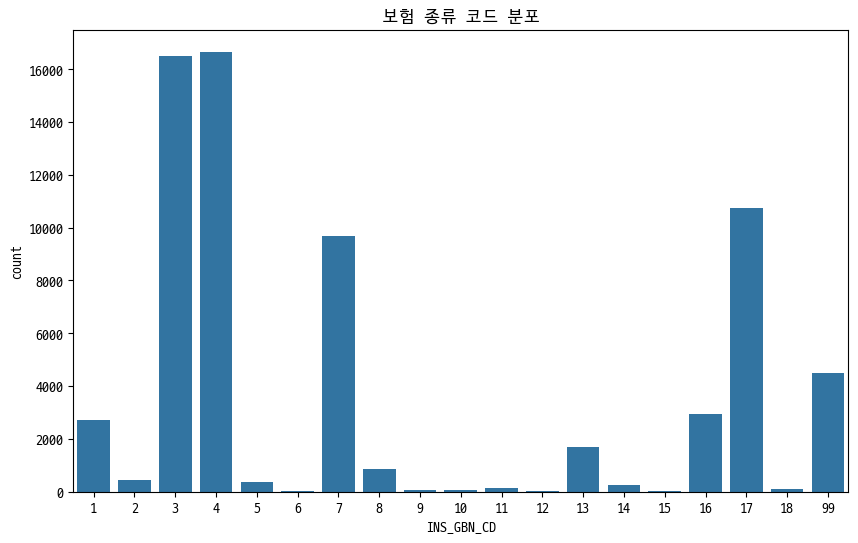

In [26]:
# 보험종류코드 분포

plt.figure(figsize=(10, 6))
sns.countplot(data=pmnt, x='INS_GBN_CD')
plt.title('보험 종류 코드 분포')
plt.show()

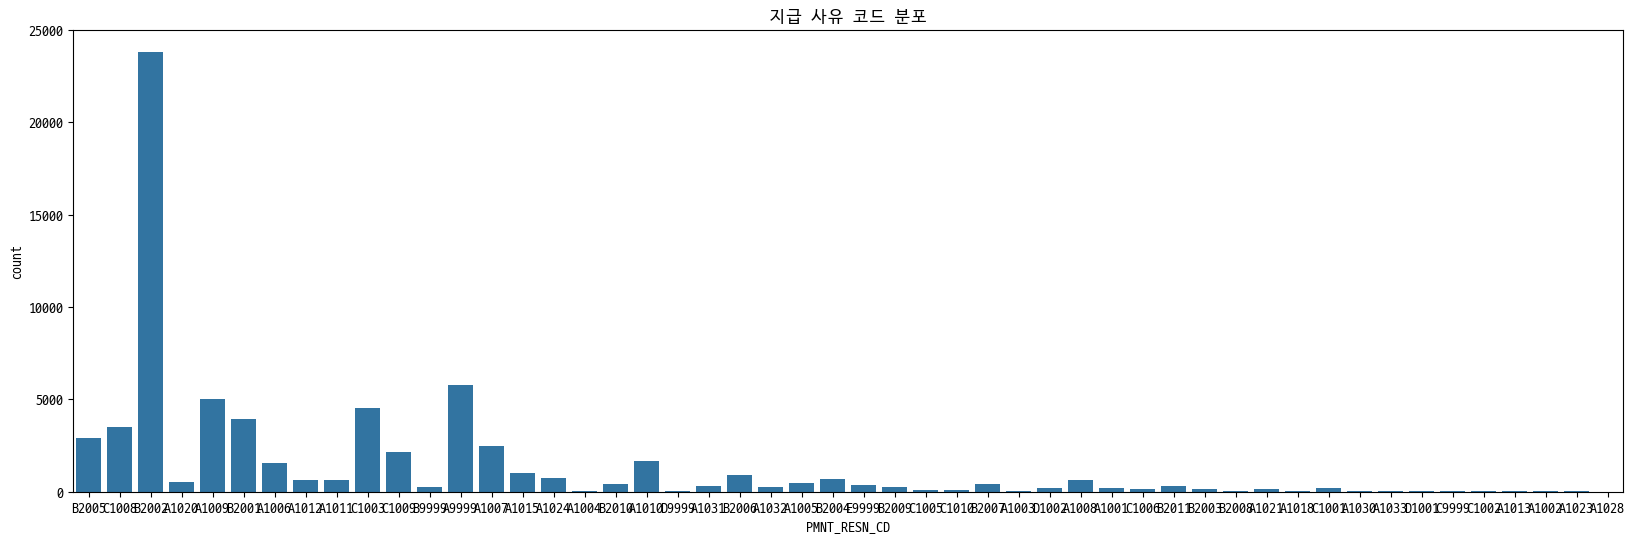

In [28]:
# 지급사유코드 분포

plt.figure(figsize=(20, 6))
sns.countplot(data=pmnt, x='PMNT_RESN_CD')
plt.title('지급 사유 코드 분포')
plt.show()

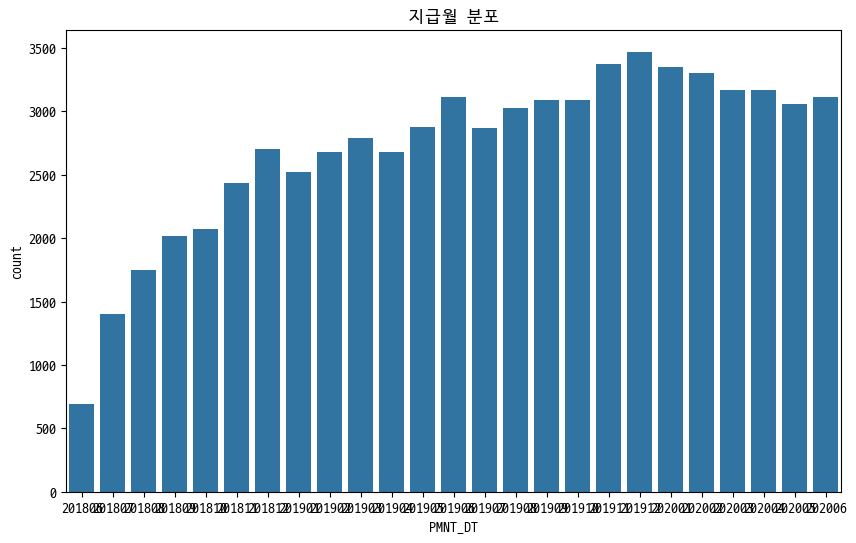

In [5]:
# 지급월 분포

plt.figure(figsize=(10, 6))
sns.countplot(data=pmnt, x='PMNT_DT')
plt.title('지급월 분포')
plt.show()

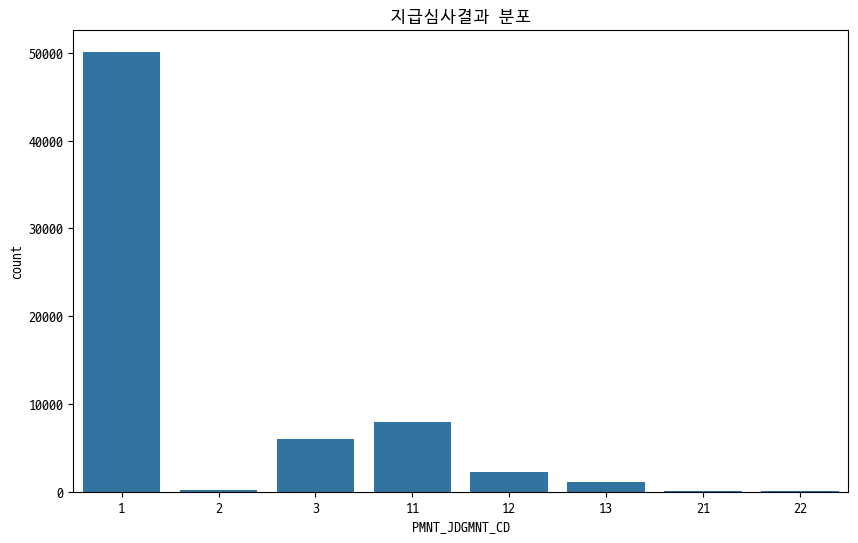

In [6]:
# 지급심사결과 분포

plt.figure(figsize=(10, 6))
sns.countplot(data=pmnt, x='PMNT_JDGMNT_CD')
plt.title('지급심사결과 분포')
plt.show()

📌 노트

- **drop** list
    - VCTM_SN(피해자물일련번호)
    - SCTR_CD(업권코드)
    - IS_PMNT_INVST(지급조사여부)

- ACCD_SN
    - 사고일련번호

- REQ_SN
    - 청구일련번호

- POL_SN
    - 증권번호

- INS_GBN_CD
    - 보험종류코드 (01~19, 99 -> 총 20개)
    - 묶어서 범주 축소

- PMNT_RESN_CD
    - 지급사유코드 (약 40개 내외?)

- PMNT_DT
    - 지급월

- PMNT_JDGMNT_CD
    - 지급심사결과코드 (8개)
    - 지급이 확정된 사안만 필터링할건지, 그냥 청구를 한 모든 건에 대해 생각할건지

### (8) 테이블별 고유값 - pmntdtl (청구지급상세사유정보)

In [32]:
pmntdtl.head(3)

,ACCD_SN,REQ_SN,SCTR_CD,POL_SN,VCTM_SN,PMNT_RESN_CD,PMNT_DT,PMNT_RESN_DTL_CD,PMNT_DTL_SN,PMNT_AMT
0,1132050,953774,8,8482978,1172,A1001,201809,1,1,10000
1,2141286,76910,6,3612735,23,B2001,202001,1,1,9400
2,1493931,1258813,6,9435298,2857,C1003,202003,12,1,600


In [31]:
pmntdtl.columns

Index(['ACCD_SN', 'REQ_SN', 'SCTR_CD', 'POL_SN', 'VCTM_SN', 'PMNT_RESN_CD',
       'PMNT_DT', 'PMNT_RESN_DTL_CD', 'PMNT_DTL_SN', 'PMNT_AMT'],
      dtype='object')

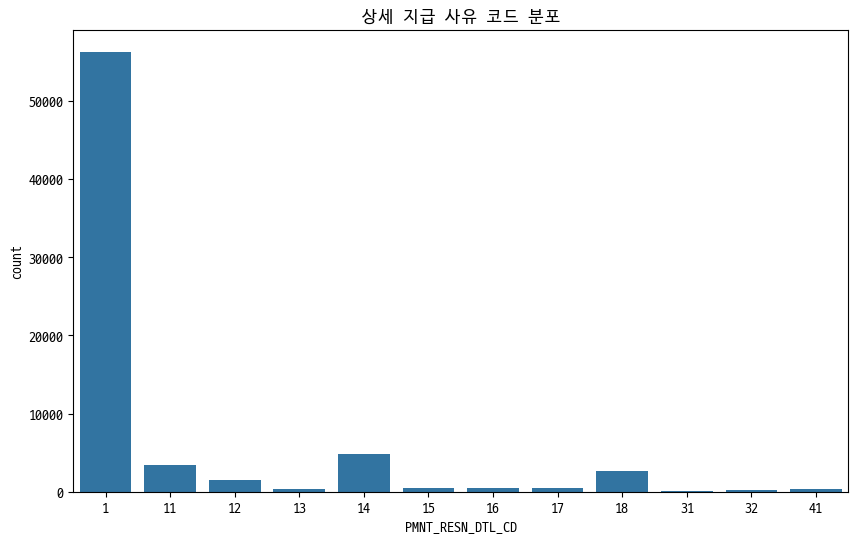

In [34]:
# 상세지급사유코드 분포

plt.figure(figsize=(10, 6))
sns.countplot(data=pmntdtl, x='PMNT_RESN_DTL_CD')
plt.title('상세 지급 사유 코드 분포')
plt.show()

C:\Users\LOVE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


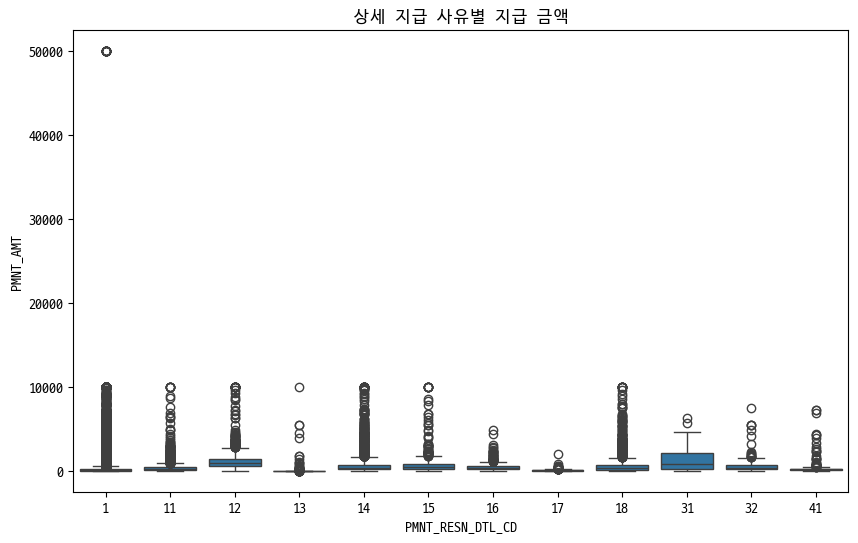

In [35]:
# 지급상세사유별 지급 금액

plt.figure(figsize=(10, 6))
sns.boxplot(data=pmntdtl, x='PMNT_RESN_DTL_CD', y='PMNT_AMT')
plt.title('상세 지급 사유별 지급 금액')
plt.show()

📌 노트

- **drop** list
    - VCTM_SN(피해자물일련번호)
    - SCTR_CD(업권코드)

- ACCD_SN
    - 사고일련번호

- REQ_SN
    - 청구일련번호

- POL_SN
    - 증권번호

- PMNT_RESN_CD
    - 지급사유코드 (약 40개 내외?)

- PMNT_DT
    - 지급월

- PMNT_RESN_DTL_CD
    - 상세지급사유코드 (12개)

- PMNT_DTL_SN
    - 상세지급일련번호

- PMNT_AMT
    - 지급금액